In [3]:
import pickle


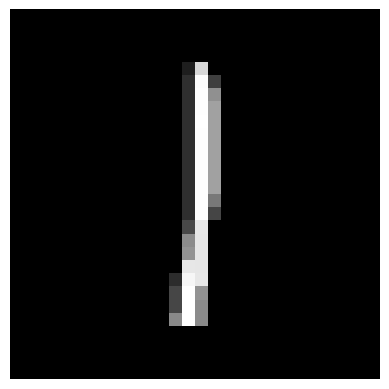

Output: 1


In [31]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

def load_data():
    """Load MNIST data using PyTorch's torchvision datasets."""

    # Define a transform to normalize the data to the range [0, 1] and convert to tensor
    transform = transforms.Compose([transforms.ToTensor()])

    # Load the MNIST training and test datasets
    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    # Split training data into training and validation sets
    train_data, val_data = torch.utils.data.random_split(train_dataset, [50000, 10000])

    return train_data, val_data, test_dataset

def display_image_and_output(image_data, label):
    """Display an MNIST image and print the corresponding digit output."""
    # Remove batch dimension and convert tensor to numpy array
    image = image_data.squeeze().numpy()

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Turn off axes for clarity
    plt.show()

    # Print the corresponding label (digit)
    print(f"Output: {label}")

# Example of how to use the function
# Load data and display the first image in the training dataset
train_data, val_data, test_data = load_data()

# Access the first image and its label
first_image_data, first_label = train_data[0]  # First image and label from the training dataset

display_image_and_output(first_image_data, first_label)

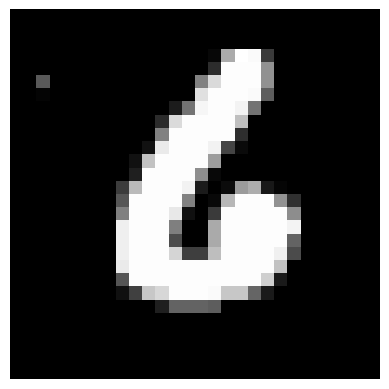

Output: 6


In [8]:
third_image_data, third_label = train_data[2]  # third image and label from the training dataset

# Display the image and the corresponding label
display_image_and_output(third_image_data, third_label)

In [14]:
#### Libraries
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

def load_data():
    """Load MNIST data using PyTorch's torchvision datasets."""

    # Define a transform to normalize the data to the range [0, 1] and convert to tensor
    transform = transforms.Compose([transforms.ToTensor()])

    # Load the MNIST test dataset
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    return test_dataset

def display_image_and_output(image_data, label):
    """Display an MNIST image and print the corresponding digit output."""
    # Remove batch dimension and convert tensor to numpy array
    image = image_data.squeeze().numpy()

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Turn off axes for clarity
    plt.show()

    # Print the corresponding label (digit)
    print(f"Output: {label}")

# Example of how to use the function
# Load test data
test_data = load_data()




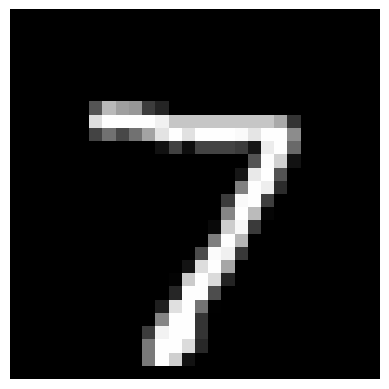

Output: 7


In [15]:
# Select an image and label from the test dataset
test_image_data, test_label = test_data[0]  # First image and label from the test dataset

# Display the image and the corresponding label
display_image_and_output(test_image_data, test_label)

Epoch [1/5], Loss: 0.1773
Epoch [2/5], Loss: 0.0510
Epoch [3/5], Loss: 0.0356
Epoch [4/5], Loss: 0.0257
Epoch [5/5], Loss: 0.0196
Test Accuracy: 99.08%


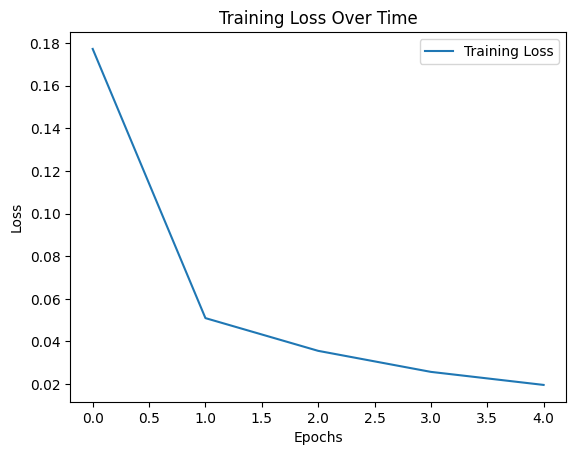

In [32]:
#### Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Convolutional layers with ReLU and MaxPooling
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor for fully connected layers
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the MNIST data
def load_data(batch_size=64):
    """Load MNIST data using PyTorch's DataLoader."""

    transform = transforms.Compose([transforms.ToTensor()])

    # Load the training and test datasets
    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    # DataLoaders
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

# Train the CNN model
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    """Train the CNN model."""

    train_loss = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Average loss for the epoch
        avg_loss = running_loss / len(train_loader)
        train_loss.append(avg_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

    return train_loss

# Test the CNN model
def test_model(model, test_loader):
    """Test the CNN model and return accuracy."""

    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    return accuracy

# Plot the training loss
def plot_loss(train_loss):
    """Plot the training loss over epochs."""
    plt.plot(train_loss, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Time')
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Hyperparameters
    num_epochs = 5
    learning_rate = 0.001
    batch_size = 64

    # Load data
    train_loader, test_loader = load_data(batch_size)

    # Create CNN model
    model = CNN()

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    train_loss = train_model(model, train_loader, criterion, optimizer, num_epochs)

    # Test the model
    accuracy = test_model(model, test_loader)

    # Plot the training loss
    plot_loss(train_loss)


Epoch [1/5], Loss: 0.1620
Epoch [2/5], Loss: 0.0499
Epoch [3/5], Loss: 0.0341
Epoch [4/5], Loss: 0.0244
Epoch [5/5], Loss: 0.0186
Accuracy of the model on the test set: 99.03%


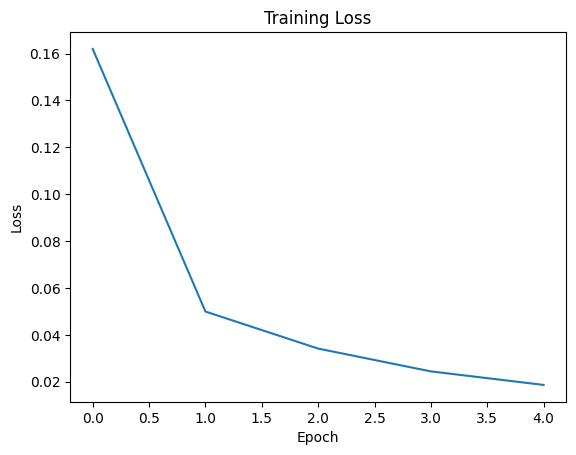

In [33]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the CNN model using nn.Sequential for simplicity
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.model(x)

# Load MNIST data using PyTorch's DataLoader
def load_data(batch_size=64):
    transform = transforms.Compose([transforms.ToTensor()])

    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

# Train the CNN model
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    train_loss = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        train_loss.append(avg_loss)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}')

    return train_loss

# Test the CNN model and return accuracy
def test_model(model, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the test set: {accuracy:.2f}%')
    return accuracy

# Visualize the training loss
def plot_loss(train_loss):
    plt.plot(train_loss)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

# Main function to execute the training and testing
def main():
    batch_size = 64
    num_epochs = 5
    learning_rate = 0.001

    train_loader, test_loader = load_data(batch_size)

    model = CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    train_loss = train_model(model, train_loader, criterion, optimizer, num_epochs)

    # Test the model
    accuracy = test_model(model, test_loader)

    # Plot the training loss
    plot_loss(train_loss)

if __name__ == '__main__':
    main()
